### Librerias


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import imblearn
from collections import Counter  
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

Se lee la data directamente desde el archivo .csv

In [3]:
# Leer el dataset
df=pd.read_csv('diabetic_data.csv')

# Data Wrangling

En esta sección se revisó toda la parte de composición de los datos, que columnas tenemos, de que tipo, histogramas de la data para conocer sus distribuciones y encontrar insights.

In [4]:
df.shape

(101766, 50)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


Se corrobora que la data esta en el mismo formato como se muestra en el diccionario de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Se revisa la parte estadistica de las variables numéricas

In [8]:
df.describe() # Aqui se puede apreciar que obtiene las estadisticas de las variables numericas incluyendo IDs, entonces
# voy a solo analizar las variables numericas que no son IDs
# Tambien las variables numericas que funcionan como variables categoricas

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
columnas_IDs = ['encounter_id', 'patient_nbr']
columnas_categoricas_en_numero= ['admission_type_id','discharge_disposition_id','admission_source_id','payer_code','medical_specialty','num_medications','diag_1','diag_2','diag_3']

# Usa el método drop() para eliminar las columnas
df_sin_IDs_sin_categoricas_en_numero = df.drop(columns=columnas_IDs+columnas_categoricas_en_numero)

In [10]:
df_sin_IDs_sin_categoricas_en_numero

,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,1,41,0,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,3,59,0,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,2,11,5,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,2,44,1,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,51,0,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,3,51,0,0,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,5,33,3,0,0,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),?,1,53,0,1,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,10,45,2,0,0,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [11]:
df_sin_IDs_sin_categoricas_en_numero.describe()

,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,42.000000,76.000000,21.000000,16.000000


In [12]:
columnas_categoricas_puras = df_sin_IDs_sin_categoricas_en_numero.select_dtypes(include=['object']).columns.tolist()
df_columnas_categoricas_puras = df_sin_IDs_sin_categoricas_en_numero[columnas_categoricas_puras]

# Seleccionar columnas numéricas puras
columnas_numericas_puras = df_sin_IDs_sin_categoricas_en_numero.select_dtypes(include=['int']).columns.tolist()
df_columnas_numericas_puras = df_sin_IDs_sin_categoricas_en_numero[columnas_numericas_puras]

In [13]:
df_columnas_numericas_puras

,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,0,0,0,1
1,3,59,0,0,0,0,9
2,2,11,5,2,0,1,6
3,2,44,1,0,0,0,7
4,1,51,0,0,0,0,5
...,...,...,...,...,...,...,...
101761,3,51,0,0,0,0,9
101762,5,33,3,0,0,1,9
101763,1,53,0,1,0,0,13
101764,10,45,2,0,0,1,9


Se realizan histogramas para hacer un análisis más profundo sobre la data de entrada, cuantos valores tiene cada clase, de que tipo de etiquetas, como se distribuye la data, si hay clases con outliers, etc

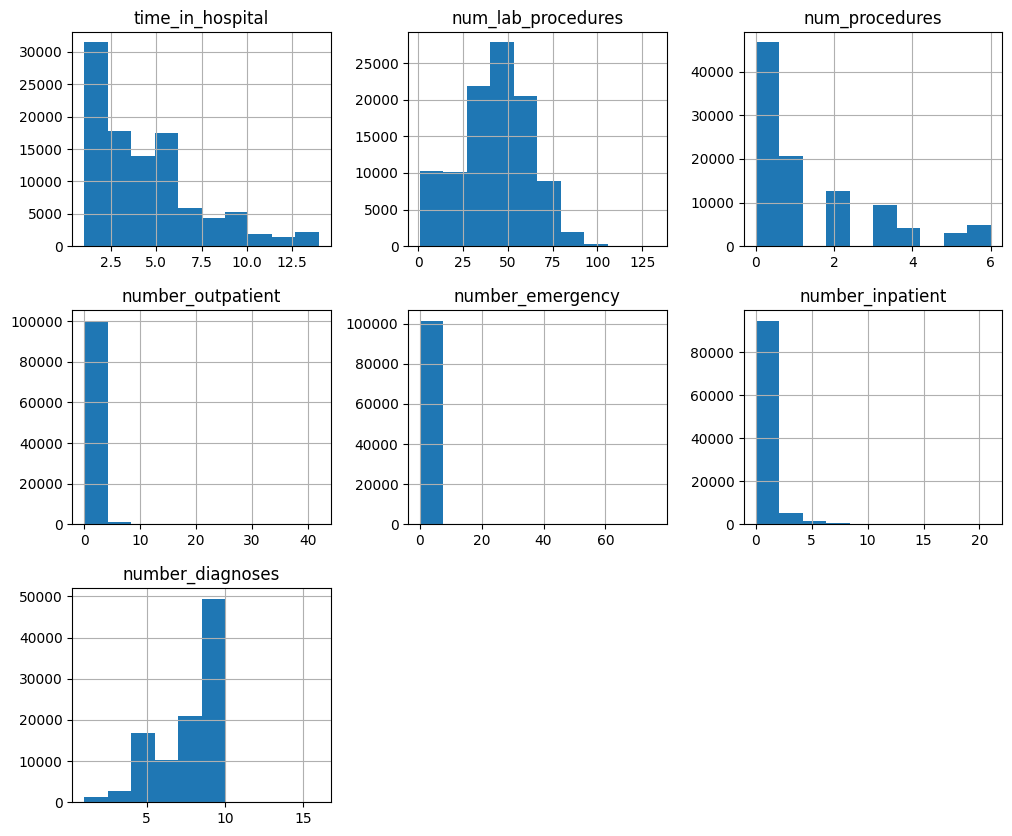

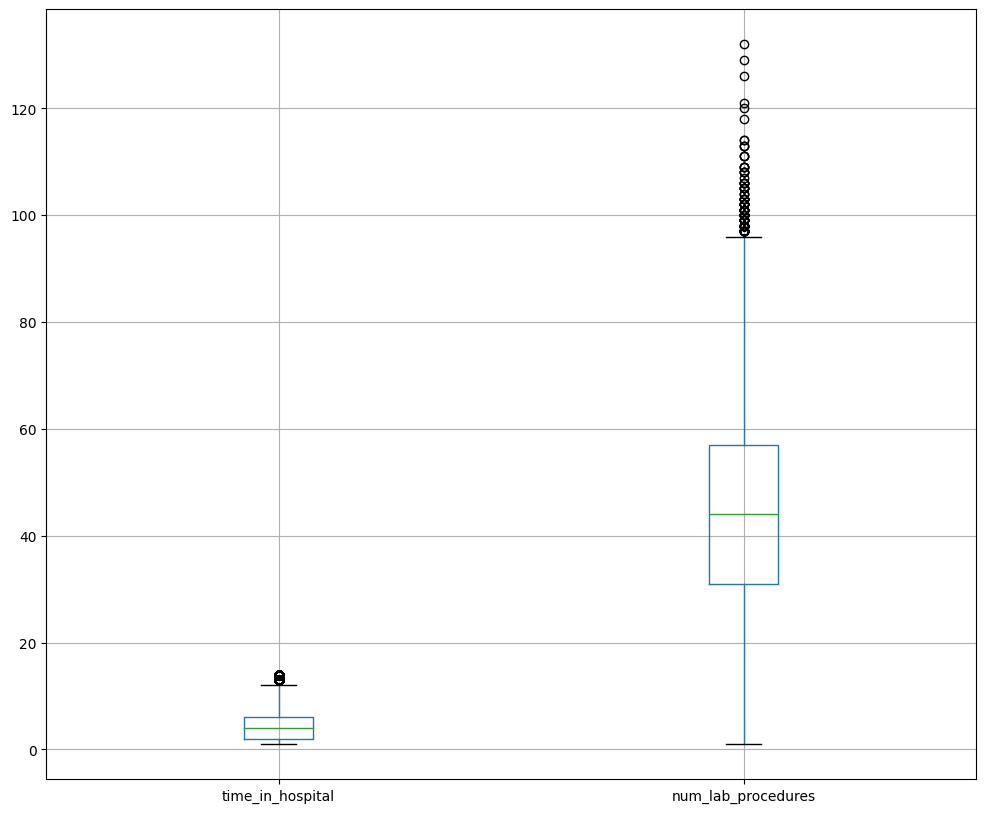

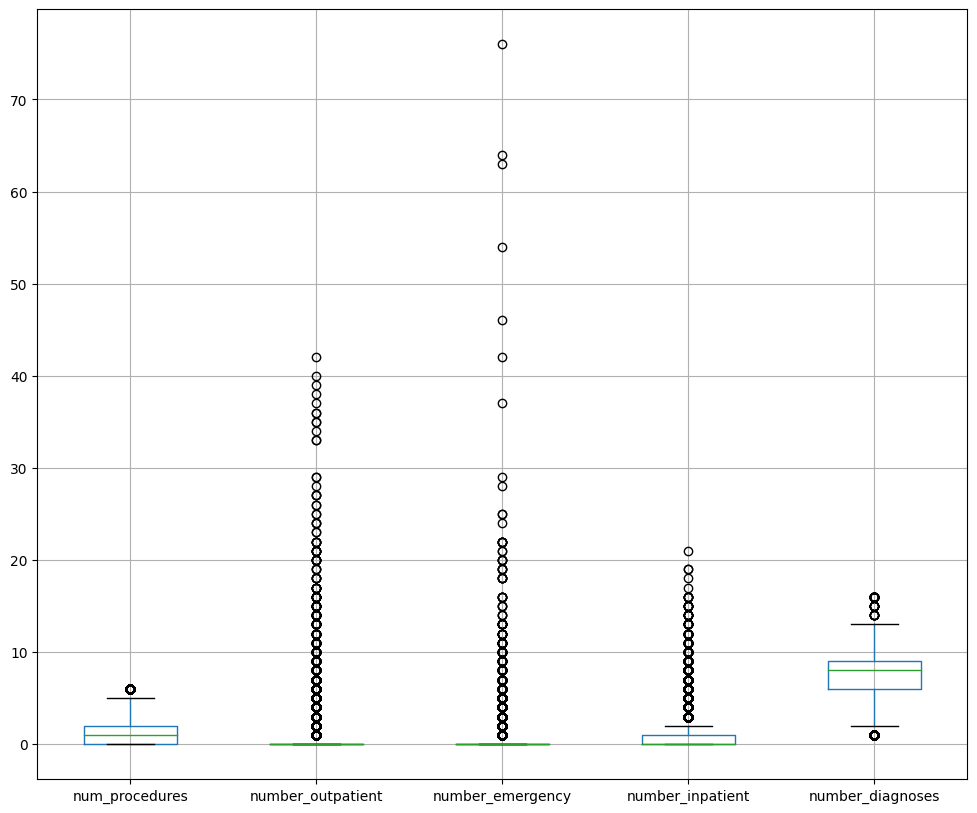

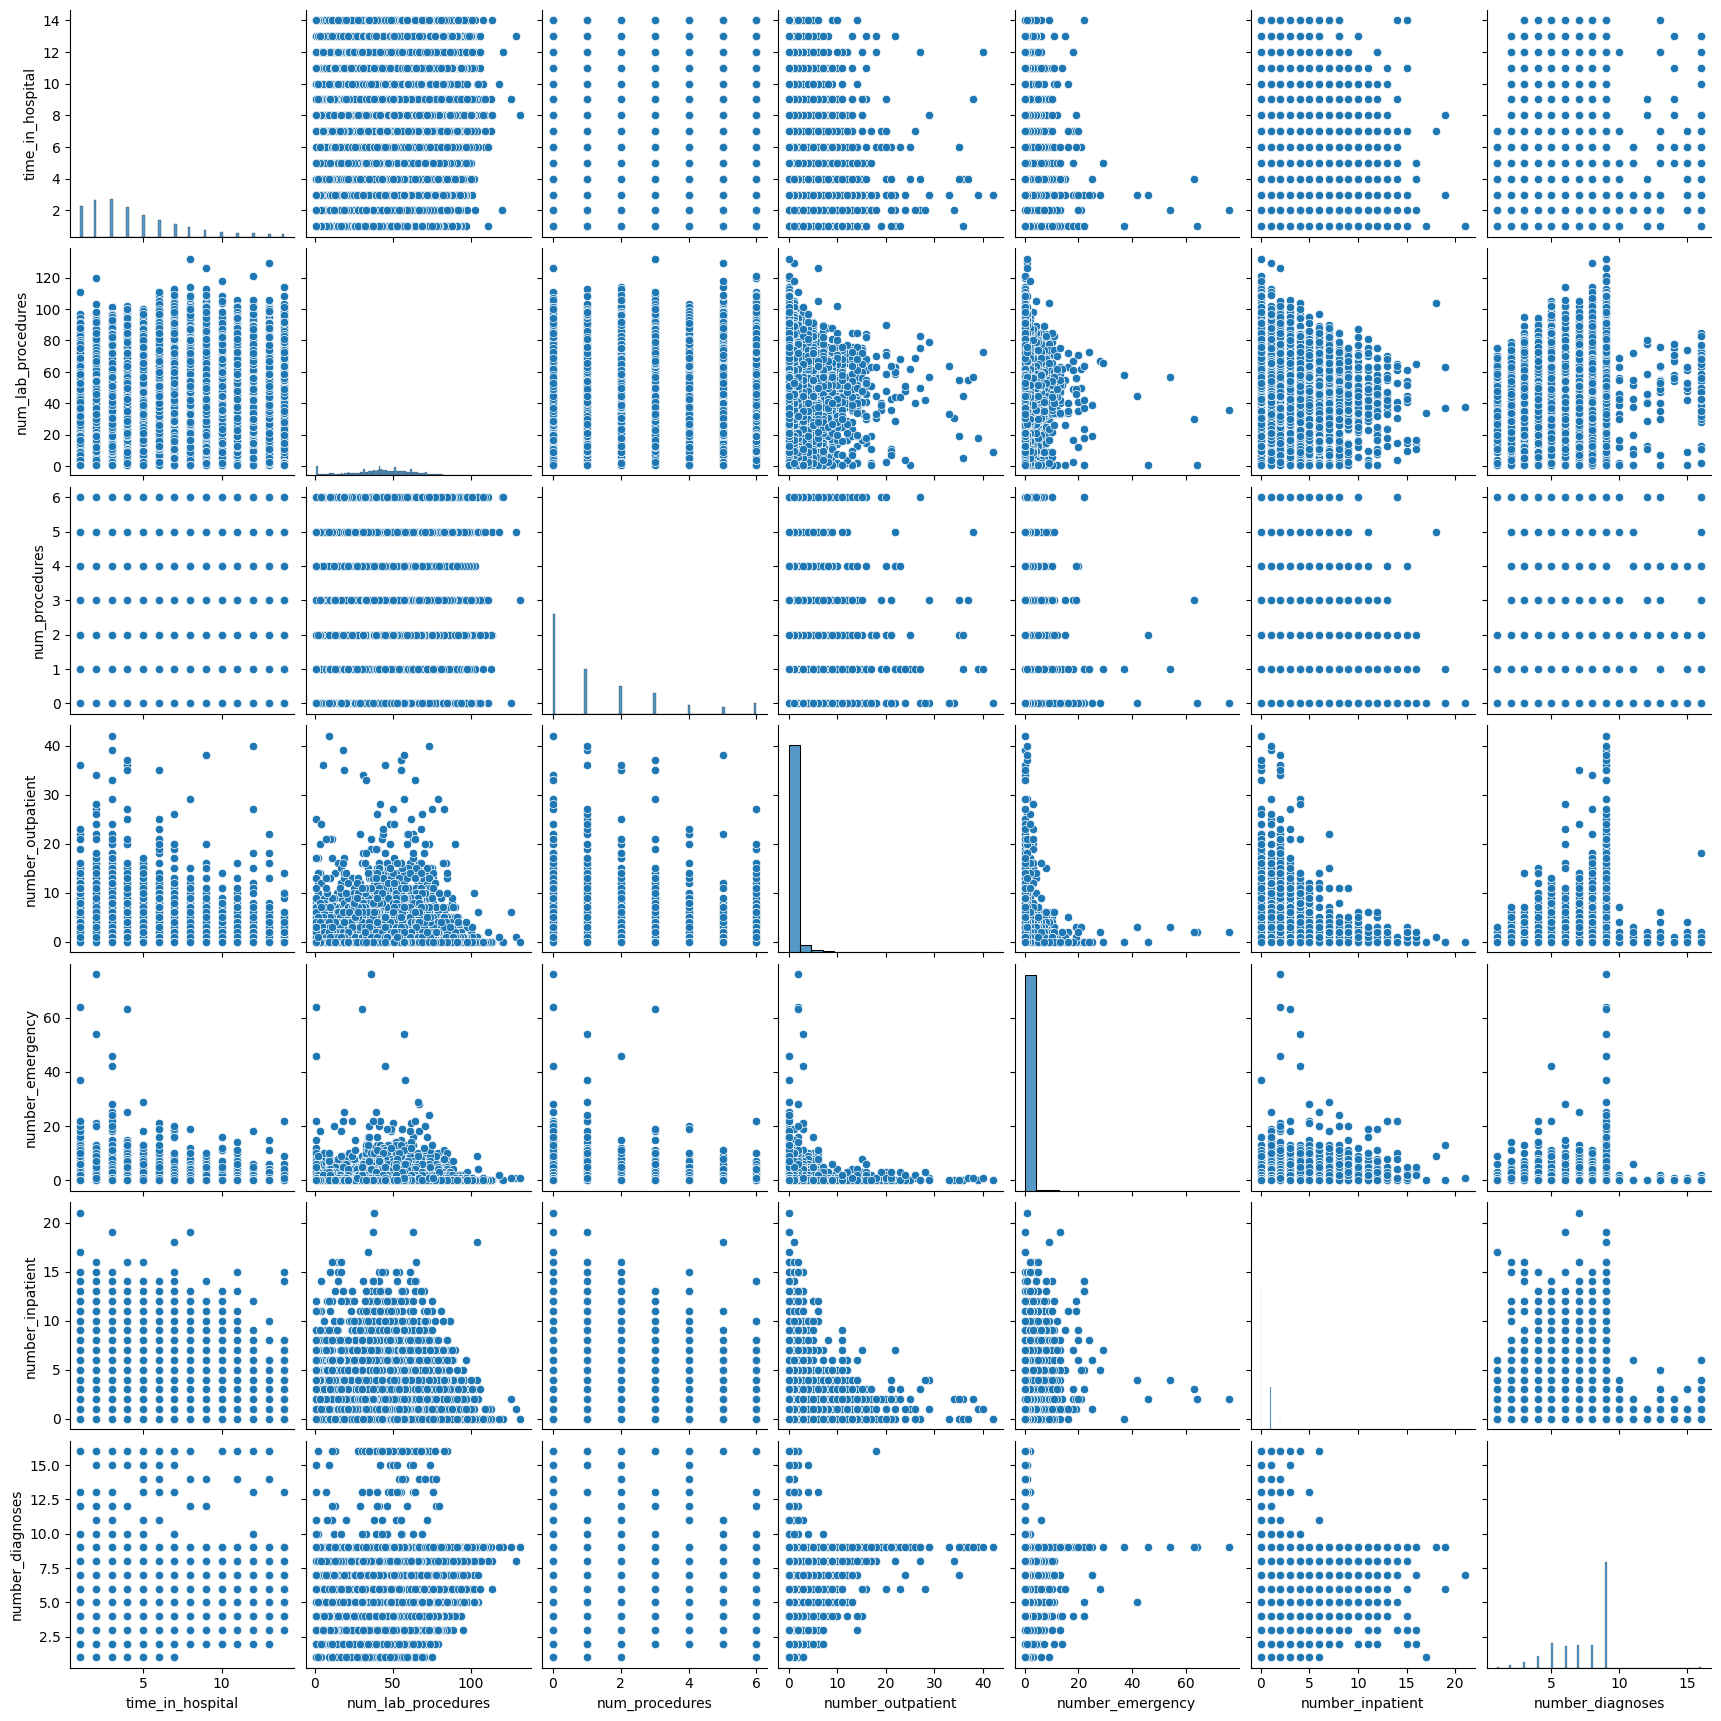

In [14]:
df_columnas_numericas_puras.hist(figsize=(12, 10))
plt.show()

# Diagramas de caja
df_columnas_numericas_puras[['time_in_hospital','num_lab_procedures']].boxplot(figsize=(12, 10))
plt.show()


df_columnas_numericas_puras[['num_procedures','number_outpatient','number_emergency','number_inpatient','number_diagnoses']].boxplot(figsize=(12, 10))
plt.show()

# Gráficos de dispersión
sns.pairplot(df_columnas_numericas_puras)
plt.show()

Limpieza de la data

In [15]:
df = df.drop_duplicates() # Remover duplicados

In [16]:
df.isnull().sum() #Aparentemente no hay nulos pero si hay si se revisan los campos donde hay "?"

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

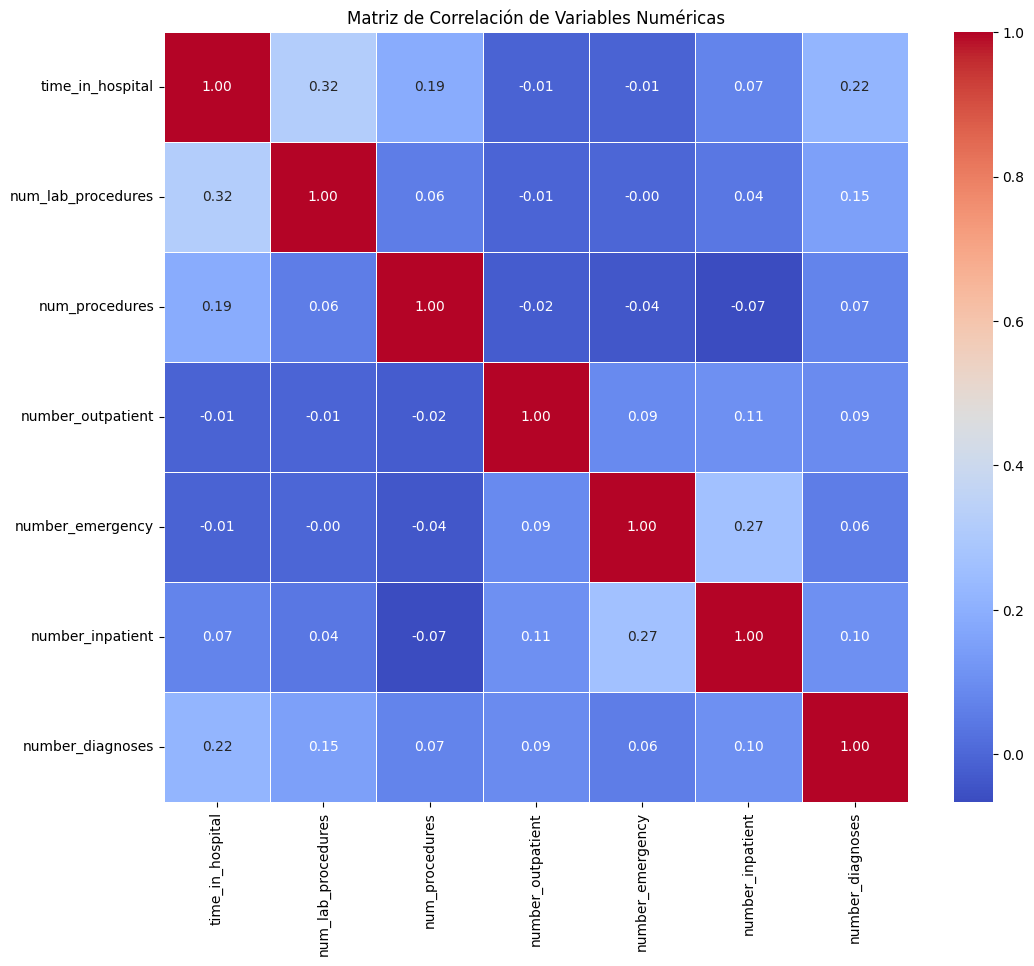

In [17]:
# Seleccionar columnas numéricas puras
columnas_numericas_puras = df_sin_IDs_sin_categoricas_en_numero.select_dtypes(include=['int', 'float']).columns.tolist()
df_columnas_numericas_puras = df_sin_IDs_sin_categoricas_en_numero[columnas_numericas_puras]

# Crear la matriz de correlación
matriz_correlacion = df_columnas_numericas_puras.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


In [18]:
categoricas= columnas_categoricas_en_numero+columnas_categoricas_puras # variables categoricas

In [19]:
df = df.dropna() # Quitar nulos

In [20]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [21]:
df.columns # Columnas presentes

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [22]:
df["metformin-pioglitazone"].value_counts() # Poca variacion

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

In [23]:
df["metformin-rosiglitazone"].value_counts()  #Poca variacion

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

In [24]:
df["glipizide-metformin"].value_counts() #Poca variacion

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

In [25]:
df["tolazamide"].value_counts() #Poca variacion

No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

In [26]:
df["examide"].value_counts() #Poca variacion

No    101766
Name: examide, dtype: int64

In [27]:
df["citoglipton"].value_counts() #Poca variacion

No    101766
Name: citoglipton, dtype: int64

In [28]:
df["A1Cresult"].value_counts() #Muchos valores nulos

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [29]:
df["medical_specialty"].value_counts() #Muchos valores nulos

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [30]:
df["payer_code"].value_counts() #Muchos valores nulos

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [31]:
df["weight"].value_counts() #Muchos valores nulos

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [32]:
# Se quitan las variables con poca variacion o muchos nulos
columnas_a_eliminar=["metformin-pioglitazone","metformin-rosiglitazone","glipizide-metformin","tolazamide","examide","citoglipton","A1Cresult","medical_specialty","payer_code","weight"]

In [33]:
df = df.drop(columns=columnas_a_eliminar) 

In [34]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazone,acarbose,miglitol,troglitazone,insulin,glyburide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Up,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Up,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Steady,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,No,No,Down,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,No,No,Steady,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,No,No,Down,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,No,No,Up,No,No,Ch,Yes,NO


Transformacion

In [35]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [36]:
# Anadir los de simbolo ? como otros
df['race'] = df['race'].apply(lambda x: 'Other' if x == '?' else x)

In [37]:
# Eliminar nulos
index=[]
index=list(df[df['diag_1']=='?'].index)
index.extend(df[df['diag_2']=='?'].index)
index.extend(df[df['diag_3']=='?'].index)


In [38]:
df.drop(index=index,inplace=True)

In [39]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazone,acarbose,miglitol,troglitazone,insulin,glyburide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Up,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Up,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Steady,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,No,No,Steady,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,No,No,Down,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,No,No,Steady,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,No,No,Down,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,No,No,Up,No,No,Ch,Yes,NO


In [40]:
# Reemplazar rango de edades por un valor
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature

df['age']=replace_age_ranges(df['age'])

In [41]:
# Lo que sea Ch se incluye en categoria yes
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [42]:
medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'insulin', 'glyburide-metformin', 'glimepiride-pioglitazone']

#Las medicinas presentes que digan no se ponen como 0 y el resto en 1
for col in medicines:
    df[col] = df[col].apply(lambda x: 0 if x == 'No' else 1)

In [43]:
# Mujer como 0 y el resto como 1
df['gender']=df['change'].apply(lambda x: 0 if x=='Female' else 1)

In [44]:
# No como 0 y el resto como 1
df['change']=df['change'].apply(lambda x : 0 if x=='No' else 1)
df['diabetesMed']=df['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [45]:
# Eliminar duplicados de ID de paciente
df.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

In [46]:
# Eliminar IDs
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

In [47]:
# Pasar Raza a numerico
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['race']=encoder.fit_transform(df['race'])

In [48]:
df["readmitted"].value_counts()

NO     42148
>30    22018
<30     6250
Name: readmitted, dtype: int64

In [49]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,rosiglitazone,acarbose,miglitol,troglitazone,insulin,glyburide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted
1,2,1,2,1,1,7,3,59,0,18,...,0,0,0,0,1,0,0,1,1,>30
2,0,1,3,1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,0,1,NO
3,2,1,4,1,1,7,2,44,1,16,...,0,0,0,0,1,0,0,1,1,NO
4,2,1,5,1,1,7,1,51,0,8,...,0,0,0,0,1,0,0,1,1,NO
5,2,1,6,2,1,2,3,31,6,16,...,0,0,0,0,1,0,0,0,1,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,2,1,8,1,1,7,9,50,2,33,...,0,0,0,0,1,0,0,1,1,>30
101755,4,1,5,1,1,7,14,73,6,26,...,0,0,0,0,1,0,0,1,1,>30
101756,4,1,7,1,1,7,2,46,6,17,...,0,0,0,0,1,0,0,0,1,>30
101758,2,1,9,1,1,7,5,76,1,22,...,0,0,0,0,1,0,0,1,1,NO


In [50]:
# Definicion de caracteristicas
X=df.drop(columns=['readmitted'])
# Crear una instancia de LabelEncoder

label_encoder = LabelEncoder()
object_columns = X.select_dtypes(include=['object']).columns.tolist()

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Iterar sobre las columnas de tipo 'object' y aplicar label encoding
for col in object_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Ajustar y transformar los datos de la columna 'readmitted'
y_encoded = label_encoder.fit_transform(df['readmitted'])

# Convertir y_encoded en un DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns=['readmitted_encoded'])
y=y_encoded_df

In [51]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,insulin,glyburide-metformin,glimepiride-pioglitazone,change,diabetesMed
1,2,1,2,1,1,7,3,59,0,18,...,0,0,0,0,0,1,0,0,1,1
2,0,1,3,1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,0,0,1
3,2,1,4,1,1,7,2,44,1,16,...,0,0,0,0,0,1,0,0,1,1
4,2,1,5,1,1,7,1,51,0,8,...,0,0,0,0,0,1,0,0,1,1
5,2,1,6,2,1,2,3,31,6,16,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,2,1,8,1,1,7,9,50,2,33,...,0,0,0,0,0,1,0,0,1,1
101755,4,1,5,1,1,7,14,73,6,26,...,0,0,0,0,0,1,0,0,1,1
101756,4,1,7,1,1,7,2,46,6,17,...,0,0,0,0,0,1,0,0,0,1
101758,2,1,9,1,1,7,5,76,1,22,...,0,0,0,0,0,1,0,0,1,1


In [52]:
y.value_counts()

readmitted_encoded
2                     42148
1                     22018
0                      6250
dtype: int64

Entrenamiento e inferencia 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Definir el modelo de árbol de decisión
dt = DecisionTreeClassifier()

# Definir los hiperparámetros a buscar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [55]:
# Entrenar el modelo con los mejores hiperparámetros
best_dt = grid_search.best_estimator_

# Ajustar el modelo con el conjunto de entrenamiento completo
best_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=20)

In [56]:
tree_rules = export_text(best_dt, feature_names=list(X.columns))
print(tree_rules)


|--- number_inpatient <= 0.50
|   |--- number_diagnoses <= 6.50
|   |   |--- age <= 6.50
|   |   |   |--- number_emergency <= 0.50
|   |   |   |   |--- admission_type_id <= 5.50
|   |   |   |   |   |--- diabetesMed <= 0.50
|   |   |   |   |   |   |--- diag_1 <= 403.50
|   |   |   |   |   |   |   |--- admission_type_id <= 1.50
|   |   |   |   |   |   |   |   |--- diag_2 <= 457.50
|   |   |   |   |   |   |   |   |   |--- diag_1 <= 150.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- diag_1 >  150.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- diag_2 >  457.50
|   |   |   |   |   |   |   |   |   |--- num_medications <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- num_medications >  8.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- admission_type_id >  1.50
|   |   |   |   |   |   |   |   |--- discha

In [57]:
# Predecir con el conjunto de entrenamiento y prueba
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calcular las métricas para el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir las métricas
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1: {train_f1}")

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1: {test_f1}")

# Guardar las métricas en variables
train_metrics = {
    'accuracy': train_accuracy,
    'precision': train_precision,
    'recall': train_recall,
    'f1': train_f1
}

test_metrics = {
    'accuracy': test_accuracy,
    'precision': test_precision,
    'recall': test_recall,
    'f1': test_f1
}


Train Accuracy: 0.6247958531562877
Train Precision: 0.5943788462917619
Train Recall: 0.6247958531562877
Train F1: 0.5574306586034148
Test Accuracy: 0.6038057370065323
Test Precision: 0.5410980451643473
Test Recall: 0.6038057370065323
Test F1: 0.5350233644891379


In [58]:

# Predecir en el conjunto de prueba
y_pred = best_dt.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Accuracy: 0.6038

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.03      0.05      1222
           1       0.45      0.19      0.27      4358
           2       0.63      0.90      0.74      8504

    accuracy                           0.60     14084
   macro avg       0.44      0.37      0.35     14084
weighted avg       0.54      0.60      0.54     14084



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de Random Forest
rf = RandomForestClassifier()

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)

C:\Users\moren\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores hiperparámetros encontrados:
{'max_depth': 20, 'n_estimators': 200}


In [60]:
best_rf = grid_search.best_estimator_

In [61]:
# Predecir con el conjunto de entrenamiento y prueba
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
train_recall_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')

# Calcular las métricas para el conjunto de prueba
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Imprimir las métricas
print(f"Train Accuracy RF: {train_accuracy_rf}")
print(f"Train Precision RF: {train_precision_rf}")
print(f"Train Recall RF: {train_recall_rf}")
print(f"Train F1 RF: {train_f1_rf}")

print(f"Test Accuracy RF: {test_accuracy_rf}")
print(f"Test Precision RF: {test_precision_rf}")
print(f"Test Recall RF: {test_recall_rf}")
print(f"Test F1 RF: {test_f1_rf}")

# Guardar las métricas en variables
train_metrics_rf = {
    'accuracy': train_accuracy_rf,
    'precision': train_precision_rf,
    'recall': train_recall_rf,
    'f1': train_f1_rf
}

test_metrics_rf = {
    'accuracy': test_accuracy_rf,
    'precision': test_precision_rf,
    'recall': test_recall_rf,
    'f1': test_f1_rf
}

Train Accuracy RF: 0.8556238017467869
Train Precision RF: 0.8818672395506512
Train Recall RF: 0.8556238017467869
Train F1 RF: 0.8462778440569427
Test Accuracy RF: 0.6192132916785005
Test Precision RF: 0.5673653321710062
Test Recall RF: 0.6192132916785005
Test F1 RF: 0.53717036463065


In [62]:
y_pred = best_rf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      1222
           1       0.50      0.18      0.26      4358
           2       0.63      0.93      0.76      8504

    accuracy                           0.62     14084
   macro avg       0.49      0.37      0.34     14084
weighted avg       0.57      0.62      0.54     14084



In [63]:
params={'iterations': 2500, 'learning_rate': 0.05, 'depth': 8}
# Inicializar el clasificador CatBoost con los parámetros dados
model = CatBoostClassifier(**params)

# Entrenar el modelo con tus datos
model.fit(X_train, y_train)

0:	learn: 1.0780041	total: 168ms	remaining: 7m
1:	learn: 1.0590534	total: 198ms	remaining: 4m 7s
2:	learn: 1.0420069	total: 228ms	remaining: 3m 9s
3:	learn: 1.0270576	total: 249ms	remaining: 2m 35s
4:	learn: 1.0130722	total: 277ms	remaining: 2m 18s
5:	learn: 1.0004173	total: 307ms	remaining: 2m 7s
6:	learn: 0.9882772	total: 338ms	remaining: 2m
7:	learn: 0.9772379	total: 373ms	remaining: 1m 56s
8:	learn: 0.9671763	total: 411ms	remaining: 1m 53s
9:	learn: 0.9582604	total: 449ms	remaining: 1m 51s
10:	learn: 0.9498862	total: 487ms	remaining: 1m 50s
11:	learn: 0.9421398	total: 521ms	remaining: 1m 48s
12:	learn: 0.9350678	total: 557ms	remaining: 1m 46s
13:	learn: 0.9283398	total: 592ms	remaining: 1m 45s
14:	learn: 0.9224232	total: 628ms	remaining: 1m 44s
15:	learn: 0.9167976	total: 665ms	remaining: 1m 43s
16:	learn: 0.9115861	total: 700ms	remaining: 1m 42s
17:	learn: 0.9068598	total: 737ms	remaining: 1m 41s
18:	learn: 0.9026235	total: 774ms	remaining: 1m 41s
19:	learn: 0.8986993	total: 813ms

In [64]:
# Predecir con el conjunto de entrenamiento y prueba
y_train_pred_catboost = model.predict(X_train)
y_test_pred_catboost = model.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
train_accuracy_catboost = accuracy_score(y_train, y_train_pred_catboost)
train_precision_catboost = precision_score(y_train, y_train_pred_catboost, average='weighted')
train_recall_catboost = recall_score(y_train, y_train_pred_catboost, average='weighted')
train_f1_catboost = f1_score(y_train, y_train_pred_catboost, average='weighted')

# Calcular las métricas para el conjunto de prueba
test_accuracy_catboost = accuracy_score(y_test, y_test_pred_catboost)
test_precision_catboost = precision_score(y_test, y_test_pred_catboost, average='weighted')
test_recall_catboost = recall_score(y_test, y_test_pred_catboost, average='weighted')
test_f1_catboost = f1_score(y_test, y_test_pred_catboost, average='weighted')

# Imprimir las métricas
print(f"Train Accuracy CatBoost: {train_accuracy_catboost}")
print(f"Train Precision CatBoost: {train_precision_catboost}")
print(f"Train Recall CatBoost: {train_recall_catboost}")
print(f"Train F1 CatBoost: {train_f1_catboost}")

print(f"Test Accuracy CatBoost: {test_accuracy_catboost}")
print(f"Test Precision CatBoost: {test_precision_catboost}")
print(f"Test Recall CatBoost: {test_recall_catboost}")
print(f"Test F1 CatBoost: {test_f1_catboost}")

# Guardar las métricas en variables
train_metrics_catboost = {
    'accuracy': train_accuracy_catboost,
    'precision': train_precision_catboost,
    'recall': train_recall_catboost,
    'f1': train_f1_catboost
}

test_metrics_catboost = {
    'accuracy': test_accuracy_catboost,
    'precision': test_precision_catboost,
    'recall': test_recall_catboost,
    'f1': test_f1_catboost
}

Train Accuracy CatBoost: 0.7938471916495065
Train Precision CatBoost: 0.8181368010611006
Train Recall CatBoost: 0.7938471916495065
Train F1 CatBoost: 0.7757978857737943
Test Accuracy CatBoost: 0.6148821357568872
Test Precision CatBoost: 0.5639739998877944
Test Recall CatBoost: 0.6148821357568872
Test F1 CatBoost: 0.560899351260868


In [65]:
# Probabilidades predichas para las clases
probs_train = model.predict_proba(X_train)
probs_test = model.predict_proba(X_test)

# Predicciones del modelo
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Informe de clasificación para el conjunto de entrenamiento
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

# Informe de clasificación para el conjunto de prueba
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      0.35      0.52      5028
           1       0.87      0.58      0.70     17660
           2       0.76      0.97      0.86     33644

    accuracy                           0.79     56332
   macro avg       0.88      0.63      0.69     56332
weighted avg       0.82      0.79      0.78     56332

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.30      0.02      0.03      1222
           1       0.47      0.28      0.35      4358
           2       0.65      0.87      0.74      8504

    accuracy                           0.61     14084
   macro avg       0.47      0.39      0.38     14084
weighted avg       0.56      0.61      0.56     14084



In [66]:
# Crear DataFrames para las métricas de entrenamiento y prueba
train_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Decision Tree': [train_metrics['accuracy'], train_metrics['precision'], train_metrics['recall'], train_metrics['f1']],
    'Random Forest': [train_metrics_rf['accuracy'], train_metrics_rf['precision'], train_metrics_rf['recall'], train_metrics_rf['f1']],
    'CatBoost': [train_metrics_catboost['accuracy'], train_metrics_catboost['precision'], train_metrics_catboost['recall'], train_metrics_catboost['f1']]
})

test_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Decision Tree': [test_metrics['accuracy'], test_metrics['precision'], test_metrics['recall'], test_metrics['f1']],
    'Random Forest': [test_metrics_rf['accuracy'], test_metrics_rf['precision'], test_metrics_rf['recall'], test_metrics_rf['f1']],
    'CatBoost': [test_metrics_catboost['accuracy'], test_metrics_catboost['precision'], test_metrics_catboost['recall'], test_metrics_catboost['f1']]
})

# Mostrar las tablas comparativas
print("Métricas de Entrenamiento")
print(train_metrics_df)

print("\nMétricas de Prueba")
print(test_metrics_df)

Métricas de Entrenamiento
      Metric  Decision Tree  Random Forest  CatBoost
0   Accuracy       0.624796       0.855624  0.793847
1  Precision       0.594379       0.881867  0.818137
2     Recall       0.624796       0.855624  0.793847
3         F1       0.557431       0.846278  0.775798

Métricas de Prueba
      Metric  Decision Tree  Random Forest  CatBoost
0   Accuracy       0.603806       0.619213  0.614882
1  Precision       0.541098       0.567365  0.563974
2     Recall       0.603806       0.619213  0.614882
3         F1       0.535023       0.537170  0.560899


Balancear las clases ya que hay muchos datos de la clase de no fue readmitido

In [67]:
sm=SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)

X_res, y_res = sm.fit_resample(X, y)

c:\Users\moren\anaconda3\envs\globant_challenge\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [68]:
y_res.value_counts()

readmitted_encoded
0                     42148
2                     42148
1                     22018
dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [70]:
# Definir el modelo de árbol de decisión
dt = DecisionTreeClassifier()

# Definir los hiperparámetros a buscar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [71]:
best_dt = grid_search.best_estimator_

In [72]:
tree_rules = export_text(best_dt, feature_names=list(X.columns))
print(tree_rules)

|--- metformin <= 0.50
|   |--- discharge_disposition_id <= 1.50
|   |   |--- insulin <= 0.50
|   |   |   |--- glipizide <= 0.50
|   |   |   |   |--- diabetesMed <= 0.50
|   |   |   |   |   |--- race <= 1.50
|   |   |   |   |   |   |--- race <= 0.50
|   |   |   |   |   |   |   |--- admission_type_id <= 2.50
|   |   |   |   |   |   |   |   |--- admission_source_id <= 6.50
|   |   |   |   |   |   |   |   |   |--- admission_source_id <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- num_medications <= 12.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- num_medications >  12.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- admission_source_id >  1.50
|   |   |   |   |   |   |   |   |   |   |--- number_diagnoses <= 5.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- 

In [73]:
# Predecir con el conjunto de entrenamiento y prueba
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calcular las métricas para el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir las métricas
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1: {train_f1}")

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1: {test_f1}")

# Guardar las métricas en variables
train_metrics = {
    'accuracy': train_accuracy,
    'precision': train_precision,
    'recall': train_recall,
    'f1': train_f1
}

test_metrics = {
    'accuracy': test_accuracy,
    'precision': test_precision,
    'recall': test_recall,
    'f1': test_f1
}

Train Accuracy: 0.8896897155824153
Train Precision: 0.8905526444642733
Train Recall: 0.8896897155824153
Train F1: 0.8882750048991239
Test Accuracy: 0.6096035366599257
Test Precision: 0.5970807606505254
Test Recall: 0.6096035366599257
Test F1: 0.6024394278459717


In [74]:
# Definir el modelo de Random Forest
rf = RandomForestClassifier()

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)

C:\Users\moren\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores hiperparámetros encontrados:
{'max_depth': 30, 'n_estimators': 200}


In [75]:
best_rf = grid_search.best_estimator_

In [76]:
# Predecir con el conjunto de entrenamiento y prueba
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
train_recall_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')

# Calcular las métricas para el conjunto de prueba
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Imprimir las métricas
print(f"Train Accuracy RF: {train_accuracy_rf}")
print(f"Train Precision RF: {train_precision_rf}")
print(f"Train Recall RF: {train_recall_rf}")
print(f"Train F1 RF: {train_f1_rf}")

print(f"Test Accuracy RF: {test_accuracy_rf}")
print(f"Test Precision RF: {test_precision_rf}")
print(f"Test Recall RF: {test_recall_rf}")
print(f"Test F1 RF: {test_f1_rf}")

# Guardar las métricas en variables
train_metrics_rf = {
    'accuracy': train_accuracy_rf,
    'precision': train_precision_rf,
    'recall': train_recall_rf,
    'f1': train_f1_rf
}

test_metrics_rf = {
    'accuracy': test_accuracy_rf,
    'precision': test_precision_rf,
    'recall': test_recall_rf,
    'f1': test_f1_rf
}

Train Accuracy RF: 0.999247510317339
Train Precision RF: 0.9992485972776188
Train Recall RF: 0.999247510317339
Train F1 RF: 0.9992475634128412
Test Accuracy RF: 0.7117528100456192
Test Precision RF: 0.6915584153181364
Test Recall RF: 0.7117528100456192
Test F1 RF: 0.6763158347688163


In [77]:
y_pred = best_rf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      8282
           1       0.49      0.15      0.23      4401
           2       0.63      0.85      0.72      8580

    accuracy                           0.71     21263
   macro avg       0.66      0.62      0.61     21263
weighted avg       0.69      0.71      0.68     21263



In [78]:
params={'iterations': 2500, 'learning_rate': 0.05, 'depth': 8}
# Inicializar el clasificador CatBoost con los parámetros dados
model = CatBoostClassifier(**params)

# Entrenar el modelo con tus datos
model.fit(X_train, y_train)

0:	learn: 1.0846066	total: 44.2ms	remaining: 1m 50s
1:	learn: 1.0719277	total: 90.6ms	remaining: 1m 53s
2:	learn: 1.0590555	total: 137ms	remaining: 1m 54s
3:	learn: 1.0485832	total: 185ms	remaining: 1m 55s
4:	learn: 1.0391537	total: 235ms	remaining: 1m 57s
5:	learn: 1.0301259	total: 282ms	remaining: 1m 57s
6:	learn: 1.0209497	total: 330ms	remaining: 1m 57s
7:	learn: 1.0117044	total: 380ms	remaining: 1m 58s
8:	learn: 1.0046151	total: 431ms	remaining: 1m 59s
9:	learn: 0.9979420	total: 481ms	remaining: 1m 59s
10:	learn: 0.9898996	total: 531ms	remaining: 2m
11:	learn: 0.9829023	total: 579ms	remaining: 2m
12:	learn: 0.9772783	total: 630ms	remaining: 2m
13:	learn: 0.9713975	total: 678ms	remaining: 2m
14:	learn: 0.9654237	total: 728ms	remaining: 2m
15:	learn: 0.9595044	total: 777ms	remaining: 2m
16:	learn: 0.9551801	total: 824ms	remaining: 2m
17:	learn: 0.9504080	total: 877ms	remaining: 2m
18:	learn: 0.9454966	total: 935ms	remaining: 2m 2s
19:	learn: 0.9411874	total: 991ms	remaining: 2m 2s
20

In [79]:
# Predecir con el conjunto de entrenamiento y prueba
y_train_pred_catboost = model.predict(X_train)
y_test_pred_catboost = model.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
train_accuracy_catboost = accuracy_score(y_train, y_train_pred_catboost)
train_precision_catboost = precision_score(y_train, y_train_pred_catboost, average='weighted')
train_recall_catboost = recall_score(y_train, y_train_pred_catboost, average='weighted')
train_f1_catboost = f1_score(y_train, y_train_pred_catboost, average='weighted')

# Calcular las métricas para el conjunto de prueba
test_accuracy_catboost = accuracy_score(y_test, y_test_pred_catboost)
test_precision_catboost = precision_score(y_test, y_test_pred_catboost, average='weighted')
test_recall_catboost = recall_score(y_test, y_test_pred_catboost, average='weighted')
test_f1_catboost = f1_score(y_test, y_test_pred_catboost, average='weighted')

# Imprimir las métricas
print(f"Train Accuracy CatBoost: {train_accuracy_catboost}")
print(f"Train Precision CatBoost: {train_precision_catboost}")
print(f"Train Recall CatBoost: {train_recall_catboost}")
print(f"Train F1 CatBoost: {train_f1_catboost}")

print(f"Test Accuracy CatBoost: {test_accuracy_catboost}")
print(f"Test Precision CatBoost: {test_precision_catboost}")
print(f"Test Recall CatBoost: {test_recall_catboost}")
print(f"Test F1 CatBoost: {test_f1_catboost}")

# Guardar las métricas en variables
train_metrics_catboost = {
    'accuracy': train_accuracy_catboost,
    'precision': train_precision_catboost,
    'recall': train_recall_catboost,
    'f1': train_f1_catboost
}

test_metrics_catboost = {
    'accuracy': test_accuracy_catboost,
    'precision': test_precision_catboost,
    'recall': test_recall_catboost,
    'f1': test_f1_catboost
}

Train Accuracy CatBoost: 0.8200491469823988
Train Precision CatBoost: 0.8301307040584051
Train Recall CatBoost: 0.8200491469823988
Train F1 CatBoost: 0.8123893760037434
Test Accuracy CatBoost: 0.7085547664957909
Test Precision CatBoost: 0.6953753889950484
Test Recall CatBoost: 0.7085547664957909
Test F1 CatBoost: 0.6893234452654912


In [80]:
# Probabilidades predichas para las clases
probs_train = model.predict_proba(X_train)
probs_test = model.predict_proba(X_test)

# Predicciones del modelo
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Informe de clasificación para el conjunto de entrenamiento
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

# Informe de clasificación para el conjunto de prueba
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     33866
           1       0.84      0.50      0.63     17617
           2       0.74      0.92      0.82     33568

    accuracy                           0.82     85051
   macro avg       0.83      0.77      0.78     85051
weighted avg       0.83      0.82      0.81     85051

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      8282
           1       0.49      0.25      0.33      4401
           2       0.64      0.82      0.72      8580

    accuracy                           0.71     21263
   macro avg       0.66      0.64      0.63     21263
weighted avg       0.70      0.71      0.69     21263



In [81]:
# Crear DataFrames para las métricas de entrenamiento y prueba
train_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Decision Tree': [train_metrics['accuracy'], train_metrics['precision'], train_metrics['recall'], train_metrics['f1']],
    'Random Forest': [train_metrics_rf['accuracy'], train_metrics_rf['precision'], train_metrics_rf['recall'], train_metrics_rf['f1']],
    'CatBoost': [train_metrics_catboost['accuracy'], train_metrics_catboost['precision'], train_metrics_catboost['recall'], train_metrics_catboost['f1']]
})

test_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Decision Tree': [test_metrics['accuracy'], test_metrics['precision'], test_metrics['recall'], test_metrics['f1']],
    'Random Forest': [test_metrics_rf['accuracy'], test_metrics_rf['precision'], test_metrics_rf['recall'], test_metrics_rf['f1']],
    'CatBoost': [test_metrics_catboost['accuracy'], test_metrics_catboost['precision'], test_metrics_catboost['recall'], test_metrics_catboost['f1']]
})

# Mostrar las tablas comparativas
print("Métricas de Entrenamiento")
print(train_metrics_df)

print("\nMétricas de Prueba")
print(test_metrics_df)

Métricas de Entrenamiento
      Metric  Decision Tree  Random Forest  CatBoost
0   Accuracy       0.889690       0.999248  0.820049
1  Precision       0.890553       0.999249  0.830131
2     Recall       0.889690       0.999248  0.820049
3         F1       0.888275       0.999248  0.812389

Métricas de Prueba
      Metric  Decision Tree  Random Forest  CatBoost
0   Accuracy       0.609604       0.711753  0.708555
1  Precision       0.597081       0.691558  0.695375
2     Recall       0.609604       0.711753  0.708555
3         F1       0.602439       0.676316  0.689323


Conclusion

Decision Tree:

Tiene el peor rendimiento en todas las métricas tanto en el conjunto de entrenamiento como en el de prueba.
Podría ser el modelo más simple, pero también el menos efectivo para este problema específico.
Recomendaciones

Random Forest:

Tiene el mejor rendimiento en el conjunto de entrenamiento en todas las métricas.
Muestra un desempeño ligeramente mejor en el conjunto de prueba en términos de precisión y recuperación.
Puede estar en riesgo de sobreajuste dado su alto rendimiento en el conjunto de entrenamiento comparado con el de prueba.

CatBoost:

Tiene un buen rendimiento en el conjunto de entrenamiento, aunque no tan alto como Random Forest.
En el conjunto de prueba, tiene la mejor precisión y F1-Score, sugiriendo un buen equilibrio entre falsos positivos y falsos negativos.
Es más robusto y consistente entre entrenamiento y prueba, sugiriendo que podría generalizar mejor que Random Forest.

Modelo a Usar: Si se busca el mejor rendimiento general y se dispone de recursos computacionales adecuados, CatBoost parece ser la mejor opción debido a su buen equilibrio entre precisión y recuperación y su consistencia entre entrenamiento y prueba.

Revisión de Hiperparámetros: Podría ser beneficioso realizar más ajustes de hiperparámetros, especialmente para Random Forest, para intentar reducir el posible sobreajuste.

Validación Adicional: Considerar usar validación cruzada y más experimentos para asegurarse de que las métricas observadas no sean específicas de una sola división de los datos.